## News-based Shock to Inflation 

- The codes in this notebook construct topic-specific shock to inflation based on news articles. 
- News media: New York Times. (Wall Streat Journal for future) 
- Currently, the sample period is 2009-2019, and there are,in total, 4670 articles.

In [1]:
import numpy as np
import pandas as pd
import nltk  
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import re

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
    
import matplotlib.pyplot as plt
%matplotlib inline

import math as mt

### 1. Data Pre-processing

In [2]:
test_txt = open('../TextData/InfNYT1.txt').read()

In [3]:
raw_txt =''
for txt_id in range(10):
    myfile = ('../TextData/InfNYT'+str(txt_id+1)+'.txt')
    #print(myfile)
    txt_temp = open(myfile).read()
    #print('lenght of the txt is '+ str(len(txt_temp)))
    raw_txt += txt_temp
print('Total length of the text is '+str(len(raw_txt)))

Total length of the text is 13774359


In [4]:
## split raw texts into articles 
divider = '\n____________________________________________________________\n'
articles = raw_txt.split(divider)

In [5]:
#articles[30]

In [6]:
len(articles)

1501

In [7]:
## create empty dataframe to store articles information
index = np.arange(len(articles))
columns = ['author',
          'text',
          'subject',
          'location',
          'company',
          'people',
           'organization',
          'title',
          'doctype',
           'date']

dt = pd.DataFrame(index=index,columns = columns)

In [8]:
## new codes that extract information about each article
author_str0 = '\nAuthor:'
author_str1 = '\nPublication info:'
author_str = [author_str0,author_str1]

text_str0 = '\nFull text:'
text_str1 = '\nSubject:'
text_str =[text_str0,text_str1]

subject_str0 = '\nSubject:'
subject_str1 = '\nLocation:'
subject_str = [subject_str0,subject_str1]

location_str0 = '\nLocation:'
location_str1 = '\nPeople:'
location_str = [location_str0,location_str1]

people_str0 = '\nPeople:'
people_str1 = '\nCompany / organization:'
people_str = [people_str0,people_str1]

organ_str0 = '\nCompany / organization:'
organ_str1 = '\nURL:'
organ_str = [organ_str0,organ_str1]

title_str0 = '\nTitle:'
title_str1 = ': \xa0'
title_str = [title_str0,title_str1]

doc_type_str0 = '\nDocument type:'
doc_type_str1 = '\nProQuest document ID:'
doc_type_str = [doc_type_str0,doc_type_str1]

date_str0 = '\nLast updated:'
date_str1 ='\nDatabase:'
date_str = [date_str0,date_str1]

str_list = {'author':author_str,
           'text':text_str,
           'subject':subject_str,
           'location':location_str,
            'organization':organ_str,
           'people':people_str,
           'title':title_str,
           'doctype':doc_type_str,
           'date':date_str}

# first, check if all articles contain these strings. 

#for article in articles:
#    for string in str_list:
#        i = 0
#        if string[0] not in article:
#            i+=1
#        if i >0:
#            print("There is "+str(i)+ ' article, for which there is no such a string' )


# second, locate them 

for i,article in enumerate(articles):
    for info,string in str_list.items():
        if string[0] in article and string[1] in article:
            loc_str = article.find(string[0])
            loc_str1= article.find(string[1])
            #print(string)
            #print(str(loc_str) + ' is where the string starts')
            extract = article[loc_str:loc_str1].split(string[0])[1]
            extract = extract.strip('\n')
            dt[info][i] = extract  

In [9]:
dt.head()

,author,text,subject,location,company,people,organization,title,doctype,date
0,"Irwin, Neil","American borrowing costs keep plunging, and t...",Unemployment; Economic conditions; Interest r...,NaN,NaN,NaN,Name: New York Stock Exchange--NYSE; NAICS: 5...,"Rates Keep Falling, Befuddling the Experts",News,2019-07-05
1,NaN,Raise a glass to the longest economic expansi...,Executive compensation; Unemployment; Economi...,United States--US,NaN,NaN,NaN,Two Cheers for a Lackluster Economy,"Opinions, Editorial",2019-07-03
2,"Smialek, Jeanna","WASHINGTON -- President Trump, who has spent ...",Nominations; Interest rates; Central banks; F...,United States--US China Japan,NaN,"Trump, Donald J Bullard, James Waller, Christ...","Name: Brookings Institution; NAICS: 541711, 5...",Trump Picks Fed Veteran And Fed Critic for Board,News,2019-07-03
3,"Friedman, Thomas L",Near the close of last Wednesday's Democratic...,Life expectancy; Political parties; Geopoliti...,United States--US,NaN,NaN,NaN,The Biggest Threat to America Is Us,"Commentary, Opinions",2019-07-03
4,"Sanger, David E",WASHINGTON -- Iran on Monday violated a key p...,Agreements; Violations; Nuclear fuels; Diplom...,Iran United States--US,NaN,"Trump, Donald J Pompeo, Mike Zarif, Mohammed ...",Name: Department of Defense; NAICS: 928110; N...,Iran Breaches Nuclear Limit Set in '15 Deal,News,2019-07-02


In [10]:
## dates 

#dates = pd.to_datetime(dt['date'])
#dt['date'] = dates

In [11]:
## types of the documents
print( "The types of documents include "+ str( set( dt['doctype'] ) ) )

The types of documents include {nan, ' Letter To The Editor', ' Commentary, Op-Ed', ' Editorial, Opinions', ' Review', ' Obituary', ' News', ' Corrections/Retraction', ' Question', ' Opinions, Letter To The Editor', ' Commentary, Opinions', ' Op-Ed', ' Opinions, Commentary', ' Obituary (Obit); Biography', ' Commentary', ' Opinions, Editorial', ' Obituary, Obituary (Obit); Biography', ' Editorial'}


In [12]:
## number of authors
print("Three are " + str( len(set(dt['author']) ) ) + " unique authors for " + str(len(articles)) + " articles.")

Three are 338 unique authors for 1501 articles.


In [13]:
## subjects 
subject_lst = []

for i in range(len(dt)):
    if str(dt['subject'][i]) != 'nan':
        subjects = dt['subject'][i].split(';')
        subject_lst += subjects
    subject_lst = [subject.strip("'") for subject in subject_lst]
    subject_set =   set(subject_lst)
print("There are " + str( len(subject_set) ) +" unique subjects")

subject_ct = [subject_lst.count(subject) for subject in subject_set]
subject_set_sort = sorted(zip (subject_ct,subject_set), reverse=True )

# the most common subjects 
subject_set_sort[:30]

There are 1441 unique subjects


[(505, ' Interest rates'),
 (301, ' Economic growth'),
 (285, ' Investments'),
 (283, ' Presidents'),
 (266, ' Economic conditions'),
 (260, ' Stock exchanges'),
 (254, ' Central banks'),
 (203, ' Federal Reserve monetary policy'),
 (201, ' Tariffs'),
 (153, ' Recessions'),
 (145, ' Tax cuts'),
 (133, ' Unemployment'),
 (120, ' Politics'),
 (117, ' Wages & salaries'),
 (117, ' Economists'),
 (116, ' Economic crisis'),
 (114, ' Securities markets'),
 (98, ' Gross Domestic Product--GDP'),
 (93, ' International trade'),
 (92, ' Prices'),
 (90, ' Employment'),
 (75, ' Stock prices'),
 (74, ' Social networks'),
 (72, ' Inflation'),
 (68, ' Dow Jones averages'),
 (67, ' Labor market'),
 (62, ' Tax rates'),
 (61, ' Budget deficits'),
 (59, ' Economic policy'),
 (58, ' Editorials')]

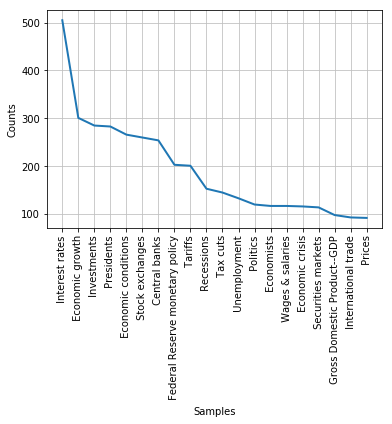

In [14]:
## most common subjects
sub_freq = nltk.FreqDist(subject_lst)
list(sub_freq.most_common(10))
plt = sub_freq.plot(20)

In [15]:
##location

location_lst = []

for i in range(len(dt)):
    if str(dt['location'][i]) != 'nan':
        locations = dt['location'][i].split(';')
        location_lst += locations
    location_lst = [location.strip("'") for location in location_lst]
    location_set =   set(location_lst)
print("There are " + str( len(location_set) ) +" unique locations")

location_ct = [location_lst.count(location) for location in location_set]
location_set_sort = sorted(zip (location_ct,location_set), reverse=True )

# the most common locations 
location_set_sort[:30]

There are 311 unique locations


[(353, ' United States--US'),
 (27, ' United States--US China'),
 (18, ' Venezuela'),
 (18, ' China United States--US'),
 (16, ' New York United States--US'),
 (9, ' United States--US New York'),
 (8, ' United States--US New York China'),
 (8, ' Turkey'),
 (7, ' United States--US Venezuela'),
 (5, ' United States--US Europe'),
 (5, ' China United States--US New York'),
 (4, ' United States--US Canada North America'),
 (4, ' Mexico United States--US China'),
 (4, ' Iran'),
 (3, ' United States--US Venezuela Latin America Western Hemisphere'),
 (3, ' United States--US Venezuela Florida South Florida'),
 (3,
  ' United States--US Venezuela Canada Peru Cuba Argentina Brazil Rio de Janeiro Brazil Colombia'),
 (3, ' United States--US New York Japan'),
 (3,
  ' United States--US New York Canada North America China Los Angeles California'),
 (3, ' United States--US New York Canada North America China'),
 (3,
  ' United States--US New York Americas Washington DC Pennsylvania Los Angeles Califor

There are 643 unique organizations


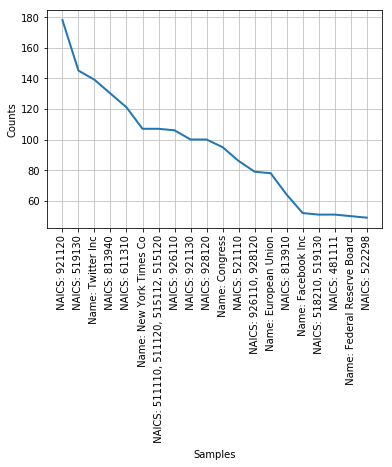

In [16]:
##organizations/companies

organization_lst = []

for i in range(len(dt)):
    if str(dt['organization'][i]) != 'nan':
        organizations = dt['organization'][i].split(';')
        organization_lst += organizations
    organization_lst = [organization.strip("'") for organization in organization_lst]
    organization_set =   set(organization_lst)
print("There are " + str( len(organization_set) ) +" unique organizations")

#organization_ct = [organization_lst.count(organization) for organization in organization_set]
#organization_set_sort = sorted(zip (organization_ct,organization_set), reverse=True )

# the most common locations 
#organization_set_sort[:30]

org_freq = nltk.FreqDist(organization_lst)
list(org_freq.most_common(10))
plt = org_freq.plot(20)

There are 302 unique authors


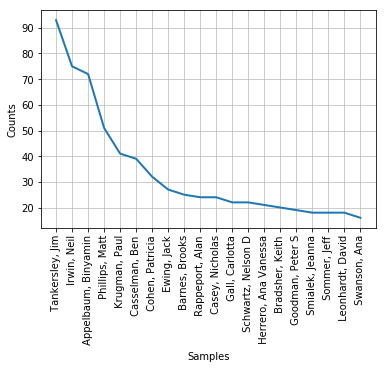

In [24]:
## author 
author_lst = []

for i in range(len(dt)):
    if str(dt['author'][i]) != 'nan':
        authors = dt['author'][i].split(';')
        author_lst += authors
    author_lst = [author.strip("'") for author in author_lst]
    author_set =   set(author_lst)
print("There are " + str( len(author_set) ) +" unique authors")

author_freq = nltk.FreqDist(author_lst)
list(author_freq.most_common(10))
plt = author_freq.plot(20)

## 2. Tokenizing

In [18]:
# tokenize the raw texts
tokenizer = nltk.RegexpTokenizer(r'\w+')  # ignore putuations 
toks = tokenizer.tokenize(raw_txt)
# convert to lower case
toks = [w.lower() for w in toks]

## clean tokens

### remove stop words
stop_words = set(stopwords.words('english'))
toks = [w for w in toks if not w in stop_words]
toks.sort()

### lemmatizing

lemmatizer = WordNetLemmatizer()
toks = [lemmatizer.lemmatize(w) for w in toks]

### exclude numbers

#toks = [w for w in toks if not r'[0-9]*']

### exclude news paper information

source_inf = ['publication','proquest','copyright']
toks = [w for w in toks if not w in source_inf]

In [19]:
# count frequency 
freq = nltk.FreqDist(toks)
print('Number of unique tokens is '+str(len(freq)))

Number of unique tokens is 30414


In [20]:
list(freq.most_common(100))

[('amp', 24013),
 ('new', 21385),
 ('york', 18673),
 ('time', 13297),
 ('mr', 11046),
 ('said', 10759),
 ('year', 10165),
 ('state', 9561),
 ('percent', 9121),
 ('company', 8277),
 ('united', 8111),
 ('n', 7654),
 ('rate', 6798),
 ('2018', 6219),
 ('info', 6010),
 ('market', 5965),
 ('trump', 5952),
 ('economy', 5530),
 ('economic', 5449),
 ('http', 5435),
 ('would', 5336),
 ('1', 5218),
 ('fed', 4896),
 ('interest', 4751),
 ('last', 4653),
 ('document', 4584),
 ('title', 4525),
 ('tax', 4320),
 ('name', 4280),
 ('stock', 4197),
 ('country', 4171),
 ('com', 4160),
 ('people', 4155),
 ('president', 4097),
 ('growth', 4036),
 ('naics', 4035),
 ('2', 3934),
 ('one', 3874),
 ('price', 3809),
 ('inflation', 3581),
 ('american', 3579),
 ('late', 3560),
 ('could', 3367),
 ('bank', 3354),
 ('central', 3314),
 ('u', 3307),
 ('east', 3229),
 ('government', 3181),
 ('subject', 3142),
 ('search', 3138),
 ('business', 3133),
 ('type', 3133),
 ('also', 3129),
 ('date', 3085),
 ('coast', 3081),
 ('ed

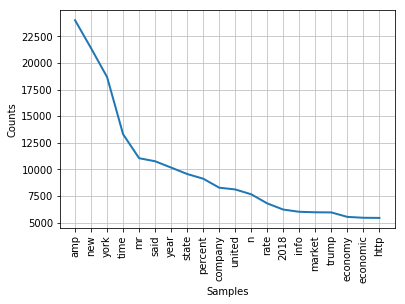

In [21]:
plt = freq.plot(20)

In [22]:
## ngrams 
toks.sort()
#bigram = list(nltk.bigrams(toks))
#bigram[-100:-1]

In [23]:
# tokenize each articles